# k-Neareast Neighbours

In [3]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from tqdm import tqdm

## Question 6

In [4]:
#function to generate the dataset S
def generate_S(n):
    X = np.random.uniform(low=[0,0], high=[1,1], size=(n,2))    #sample n centers uniformly from [0,1]^2
    y = np.random.choice([0,1], size=n)                         #sample n labels uniformly from {0,1}
    return np.column_stack([X,y]), X, y                         #return the complete dataset S

#function to compute the euclidean distance between two data points
def euclidean_distance(a, b):
    return np.linalg.norm(a-b, axis=1)

#function to find the nearest v neighbours of a target data point
def find_neigbours(target, X, y, v):
    distances = euclidean_distance(target, X)           #compute the distance
    k_neighbours = np.argsort(distances)[:v]            #obtain the indices of the v nearest neighbours
    return X[k_neighbours], y[k_neighbours]

#function to implement the KNN algorithm
def KNN(X, y, v, X_test):
    '''
    X: training data points
    y: labels of the training data points
    v: number of nearest neighbours to be considered
    X_test: data points to be classified
    '''
    y_pred = []
    
    if len(y) < v:                                                #corner cases where we don't have enough labelled data
        for _ in range(len(X_test)):
            y_pred.append(np.random.choice([0,1]))                #prediction is generated randomly
        return np.array(y_pred)
    
    for target in X_test:
        neighbours, votes = find_neigbours(target, X, y, v)       #find the v nearest neighbours and their labels
        if np.mean(votes) > 0.5:                                  #majority vote is 1
            y_pred_i = 1
        elif np.mean(votes) < 0.5:                                #majority vote is 0
            y_pred_i = 0
        else:                                                     #majority vote is undefined
            y_pred_i = np.random.choice([0,1])
        y_pred.append(y_pred_i)
    return np.array(y_pred)

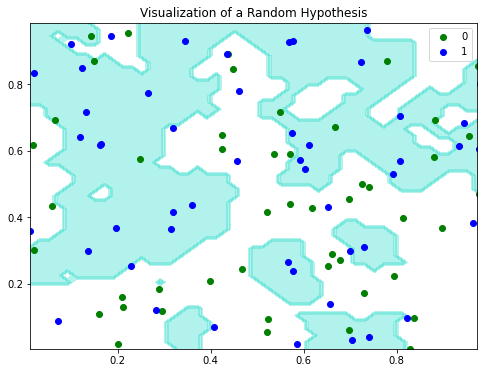

In [3]:
np.random.seed(0)             #set a random seed

S, X, y = generate_S(100)       #generate 100 labelled centers 

#prepare the mesh grid X values as test data in order to plot the colored map
resolution = 0.02
x1_min, x1_max = X[:,0].min(), X[:,0].max()
x2_min, x2_max = X[:,1].min(), X[:,1].max()
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
X_mesh = np.array([xx1.ravel(), xx2.ravel()]).T

#implement the KNN algorithm on the mesh grid X values
Z = KNN(X, y, 3, X_mesh)
Z = Z.reshape(xx1.shape)

#plot the colored map
fig = plt.figure(figsize=(8,6))
plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=ListedColormap(['white','turquoise']))
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())

#plot the training data S
X_0 = np.array([data[:2] for data in S if data[2]==0])
X_1 = np.array([data[:2] for data in S if data[2]==1])
plt.scatter(X_0[:,0], X_0[:,1], color='green', label='0')
plt.scatter(X_1[:,0], X_1[:,1], color='blue', label='1')
plt.title('Visualization of a Random Hypothesis')
plt.legend()
plt.show()

## Question 7

In [6]:
#function to generate the training and test sets
def generate_data(n, X_h, y_h, v):
    X = np.random.uniform(low=[0,0], high=[1,1], size=(n,2))           #sample n centers uniformly from [0,1]^2
    y = []
    for i in range(n):
        if np.random.choice([0,1], p=[0.2,0.8]):                       #flip the biased coin and if the result is head...
            y_i = KNN(X_h, y_h, v, [X[i]])[0]                          #use the hypothesis to obtain the label
        else:
            y_i = np.random.choice([0,1])                              #sample the label uniformly from {0,1}
        y.append(y_i)
    return np.column_stack([X,y]), X, np.array(y)

#function to compute the generalisation error
def compute_error(y_true, y_pred):
    return sum(y_true!=y_pred) / len(y_true)

In [461]:
np.random.seed(1)                #set a random seed

n, errors, k_list = 100, [], np.arange(1,50)

for k in k_list:
    error = 0
    for _ in tqdm(range(n)):
        S_h, X_h, y_h = generate_S(100)                                     #sample a hypothesis
        S_train, X_train, y_train = generate_data(4000, X_h, y_h, v=3)      #generate the training data
        S_test, X_test, y_test = generate_data(1000, X_h, y_h, v=3)         #generate the test data
        y_pred = KNN(X_train, y_train, k, X_test)
        error += compute_error(y_test, y_pred)
    errors.append(error/n)
    print(k, 'neighbours: ', round(error/n,5))

  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

1 neighbours:  0.20321


  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

2 neighbours:  0.21298


  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

3 neighbours:  0.15661


  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

4 neighbours:  0.16331


  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

5 neighbours:  0.14826


  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

6 neighbours:  0.15174


  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

7 neighbours:  0.14606


  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

8 neighbours:  0.1495


  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

9 neighbours:  0.14593


  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

10 neighbours:  0.14715


  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

11 neighbours:  0.14695


  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

12 neighbours:  0.14744


  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

13 neighbours:  0.14531


  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

14 neighbours:  0.14641


  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

15 neighbours:  0.14913


  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

16 neighbours:  0.15055


  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

17 neighbours:  0.14973


  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

18 neighbours:  0.15202


  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

19 neighbours:  0.15213


  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

20 neighbours:  0.15484


  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

21 neighbours:  0.15213


  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

22 neighbours:  0.15377


  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

23 neighbours:  0.15441


  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

24 neighbours:  0.15411


  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

25 neighbours:  0.1555


  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

26 neighbours:  0.15462


  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

27 neighbours:  0.15723


  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

28 neighbours:  0.15751


  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

29 neighbours:  0.15538


  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

30 neighbours:  0.15702


  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

31 neighbours:  0.15796


  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

32 neighbours:  0.15838


  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

33 neighbours:  0.16198


  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

34 neighbours:  0.16161


  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

35 neighbours:  0.16209


  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

36 neighbours:  0.16203


  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

37 neighbours:  0.15844


  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

38 neighbours:  0.16373


  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

39 neighbours:  0.1645


  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

40 neighbours:  0.16346


  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

41 neighbours:  0.16687


  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

42 neighbours:  0.16674


  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

43 neighbours:  0.16586


  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

44 neighbours:  0.16442


  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

45 neighbours:  0.16947


  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

46 neighbours:  0.16561


  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

47 neighbours:  0.16588


  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

48 neighbours:  0.17022


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:54<00:00,  1.82it/s]

49 neighbours:  0.16887


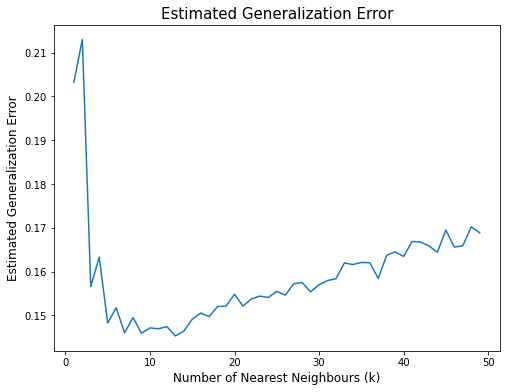

In [462]:
figure = plt.figure(figsize=(8,6))
plt.plot(k_list, errors)
plt.xlabel('Number of Nearest Neighbours (k)', fontsize=12)
plt.ylabel('Estimated Generalization Error', fontsize=12)
plt.title('Estimated Generalization Error', fontsize=15)
plt.show()

## Question 8

In [7]:
np.random.seed(2)             #set a random seed

n, k_list, k_best, m_list = 100, np.arange(1,50), [], np.append(np.array([100]),np.arange(500,4500,500))

for m in m_list:
    k_i = []
    for _ in tqdm(range(n)):
        error_min = 1
        for k in k_list:
            S_h, X_h, y_h = generate_S(100)                                 #sample a hypothesis
            S_train, X_train, y_train = generate_data(m, X_h, y_h, v=3)     #generate the training data
            S_test, X_test, y_test = generate_data(1000, X_h, y_h, v=3)     #generate the test data
            y_pred = KNN(X_train, y_train, k, X_test)                       #make predictions with k nearest neighbours
            error = compute_error(y_test, y_pred)                           #compute the prediction error
            if error < error_min:
                k_best_i = k
                error_min = error
        k_i.append(k_best_i)
    k_best.append(np.mean(k_i))                                             #obtain the averaged optimal k value
    print(f'For {m} training data, the best k is {np.mean(k_i)}')

  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

For 100 training data, the best k is 8.09


  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

For 500 training data, the best k is 9.13


  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

For 1000 training data, the best k is 11.88


  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

For 1500 training data, the best k is 13.23


  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

For 2000 training data, the best k is 13.47


  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

For 2500 training data, the best k is 14.83


  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

For 3000 training data, the best k is 16.14


  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

For 3500 training data, the best k is 15.96


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [49:07<00:00, 29.47s/it]

For 4000 training data, the best k is 17.98


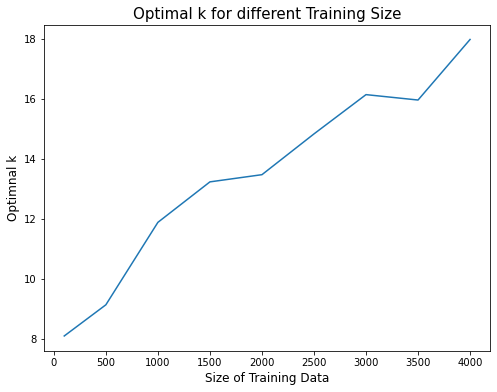

In [8]:
figure = plt.figure(figsize=(8,6))
plt.plot(m_list, k_best)
plt.xlabel('Size of Training Data', fontsize=12)
plt.ylabel('Optimnal k', fontsize=12)
plt.title('Optimal k for different Training Size', fontsize=15)
plt.show()